In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
sns.set(style="whitegrid")


In [2]:
df = pd.read_csv("data_limpio.csv")
df.head()


,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion,CTR,CPC,CPA,conversion_rate
0,708746,2017-08-17,2017-08-17,916,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0,0.013605,1.43,1.43,100.0
1,708749,2017-08-17,2017-08-17,916,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0,0.011198,0.91,0.00,0.0
2,708771,2017-08-17,2017-08-17,916,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0,0.000000,0.00,0.00,0.0
3,708815,2017-08-30,2017-08-30,916,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0,0.023480,1.25,0.00,0.0
4,708818,2017-08-17,2017-08-17,916,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0,0.024195,1.29,1.29,100.0


In [3]:
# Vista general de estadísticas numéricas
df.describe()


c:\Users\User\Desktop\Data_analyst_project1\venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,ad_id,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion,CTR,CPC,CPA,conversion_rate
count,1.143000e+03,1143.000000,1.143000e+03,1143.000000,1.143000e+03,1143.000000,1143.000000,761.000000,761.000000,1143.000000,1143.000000,1143.000000,764.000000
mean,9.872611e+05,33.884514,1.180606e+05,42.474191,6.872500e+04,11.629921,17.597760,2.161629,0.768725,inf,0.835378,6.973625,11.190514
std,1.939928e+05,27.560263,2.670506e+05,48.987248,2.067023e+05,27.347899,48.418711,4.062201,1.656445,NaN,0.716194,22.002846,26.416019
min,7.087460e+05,2.000000,3.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,16.000000,2.200000e+01,19.000000,1.442650e+02,1.000000,0.000000,1.000000,0.000000,0.011091,0.000000,0.000000,0.000000
50%,1.121185e+06,26.000000,3.300000e+01,27.000000,3.142000e+03,2.000000,1.530000,1.000000,0.000000,0.023442,0.990000,0.000000,0.000000
75%,1.121804e+06,32.000000,9.889400e+04,38.000000,2.786400e+04,8.000000,8.540000,2.000000,1.000000,2.652577,1.537567,0.000000,5.555556
max,1.314415e+06,120.000000,2.286228e+06,421.000000,3.052003e+06,340.000000,639.949998,60.000000,21.000000,inf,2.212000,232.370001,200.000000


In [4]:
# Ver columnas únicas de interés
print("Géneros:", df['gender'].unique())
print("Edades:", df['age'].unique())


Géneros: ['M' 'F' '14' '21' '19' '17' '20' '22' '24' '25' '23' '26' '27' '28' '29'
 '30' '33' '31' '32' '34' '35' '36' '37' '38' '68' '64' '65' '69' '67' '5'
 '71' '13' '18' '66' '8' '6' '10' '72' '15' '16' '70' '4' '9' '12' '41'
 '11' '106' '104' '107' '108' '112' '117' '116' '105' '110' '113' '114'
 '109' '115' '102' '103' '111' '118']
Edades: ['30-34' '35-39' '40-44' '45-49' '10' '15' '16' '18' '19' '20' '21' '22'
 '23' '24' '25' '26' '27' '28' '29' '31' '32' '36' '63' '64' '65' '2' '66'
 '30' '7' '100' '101' '102' '103' '105' '107' '110' '111' '112' '113'
 '108' '109' '114' '104' '106']


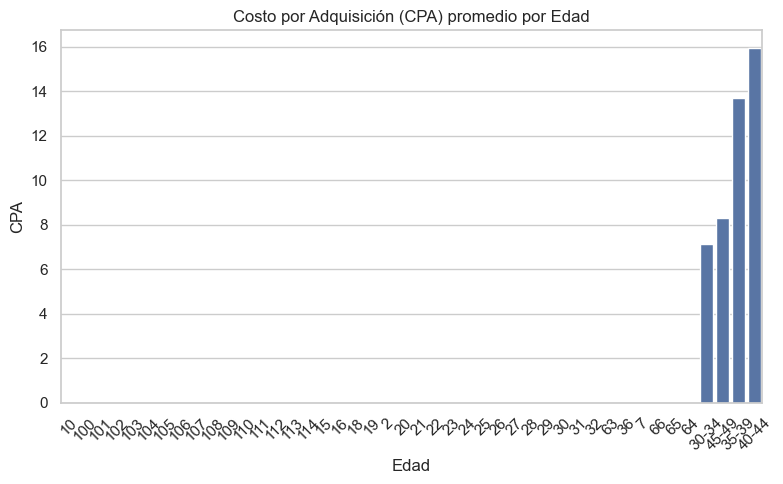

In [5]:
# CPA promedio por grupo de edad
edad_cpa = df.groupby('age')['CPA'].mean().sort_values()

plt.figure(figsize=(8,5))
sns.barplot(x=edad_cpa.index, y=edad_cpa.values)
plt.title('Costo por Adquisición (CPA) promedio por Edad')
plt.ylabel('CPA')
plt.xlabel('Edad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


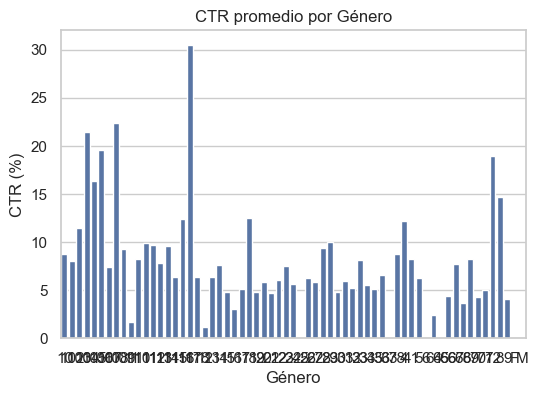

In [6]:
genero_ctr = df.groupby('gender')['CTR'].mean()

plt.figure(figsize=(6,4))
sns.barplot(x=genero_ctr.index, y=genero_ctr.values)
plt.title('CTR promedio por Género')
plt.ylabel('CTR (%)')
plt.xlabel('Género')
plt.show()


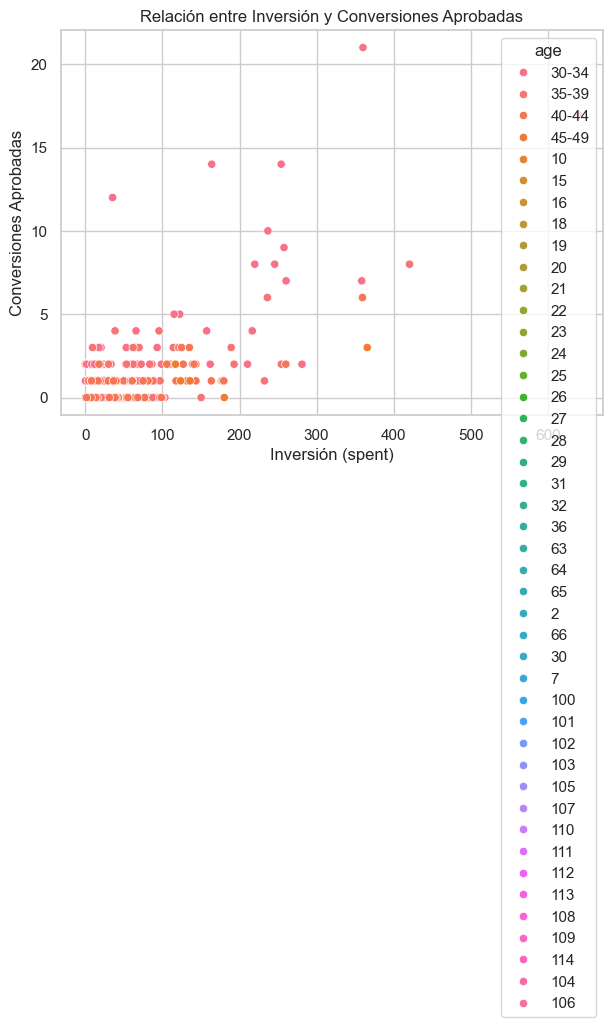

In [7]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='spent', y='approved_conversion', hue='age')
plt.title('Relación entre Inversión y Conversiones Aprobadas')
plt.xlabel('Inversión (spent)')
plt.ylabel('Conversiones Aprobadas')
plt.show()


In [8]:
resumen = df.groupby('campaign_id').agg({
    'spent': 'sum',
    'clicks': 'sum',
    'approved_conversion': 'sum',
    'CTR': 'mean',
    'CPC': 'mean',
    'CPA': 'mean'
}).sort_values(by='approved_conversion', ascending=False)

resumen.head()


,spent,clicks,approved_conversion,CTR,CPC,CPA
campaign_id,,,,,,
1178,16577.159998,9577,378.0,0.012854,1.644663,28.601278
936,2893.369999,1984,183.0,0.016502,0.846742,2.037378
916,149.710001,113,24.0,0.018015,0.862264,1.396296
35-39,78.000000,269,0.0,8.099996,0.291737,0.000000
30-34,166.000000,541,0.0,inf,0.314366,0.000000


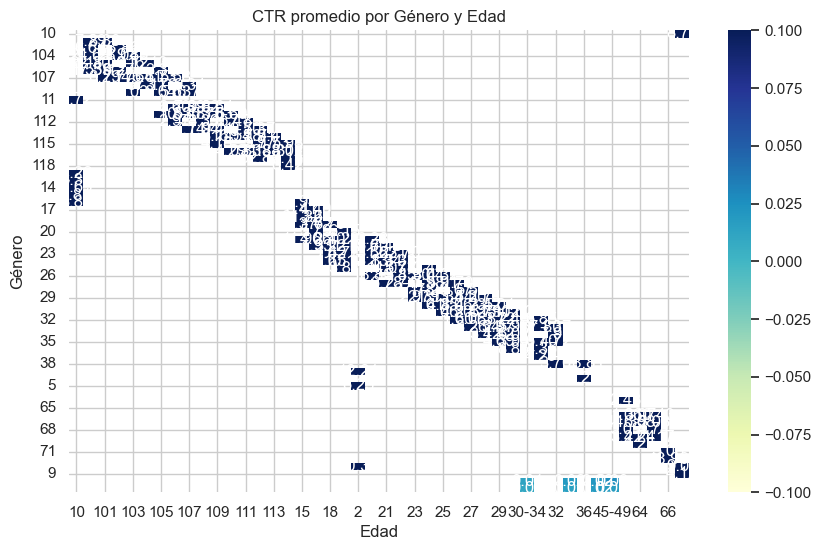

In [9]:
# Agrupar por género y edad, calcular CTR promedio
ctr_demografico = df.groupby(['gender', 'age'])['CTR'].mean().unstack()

# Visualizar con un heatmap
plt.figure(figsize=(10,6))
sns.heatmap(ctr_demografico, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("CTR promedio por Género y Edad")
plt.ylabel("Género")
plt.xlabel("Edad")
plt.show()


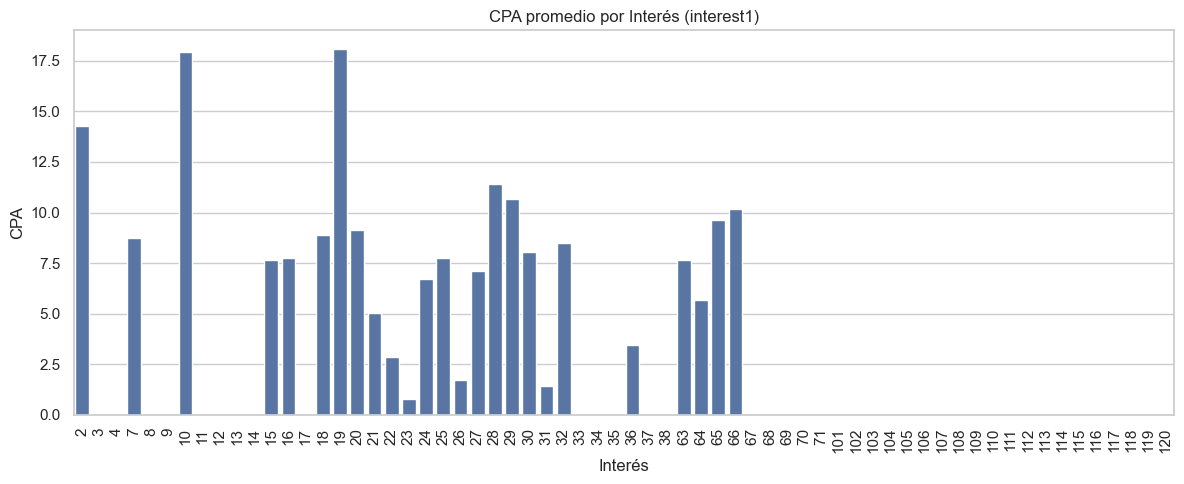

In [10]:
# CPA promedio por interest1
interest_cpa = df.groupby('interest1')['CPA'].mean().sort_values()

plt.figure(figsize=(12,5))
sns.barplot(x=interest_cpa.index, y=interest_cpa.values)
plt.title("CPA promedio por Interés (interest1)")
plt.xlabel("Interés")
plt.ylabel("CPA")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


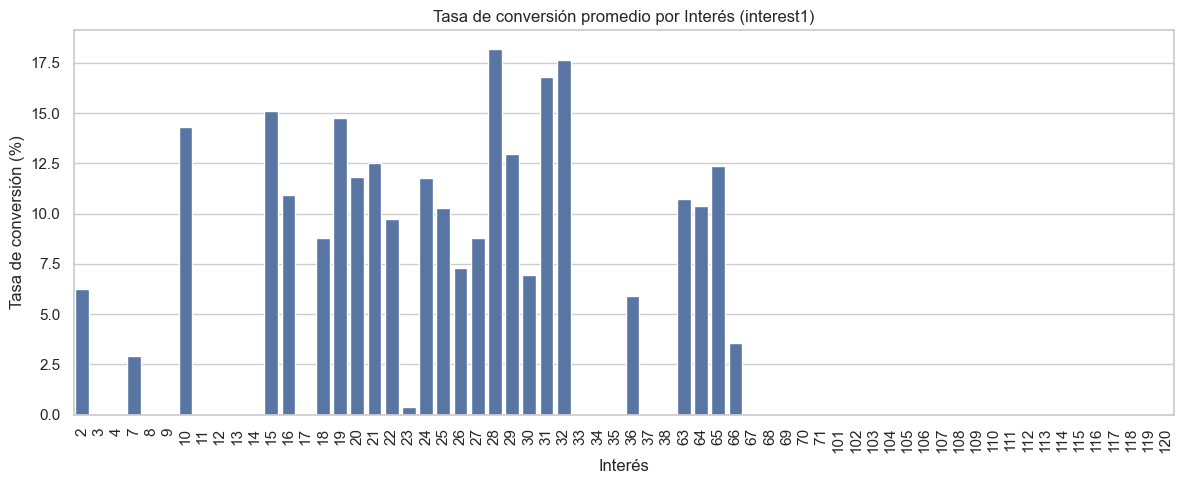

In [11]:
# Tasa de conversión promedio por interest1
interest_conv = df.groupby('interest1')['conversion_rate'].mean().sort_values()

plt.figure(figsize=(12,5))
sns.barplot(x=interest_conv.index, y=interest_conv.values)
plt.title("Tasa de conversión promedio por Interés (interest1)")
plt.xlabel("Interés")
plt.ylabel("Tasa de conversión (%)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


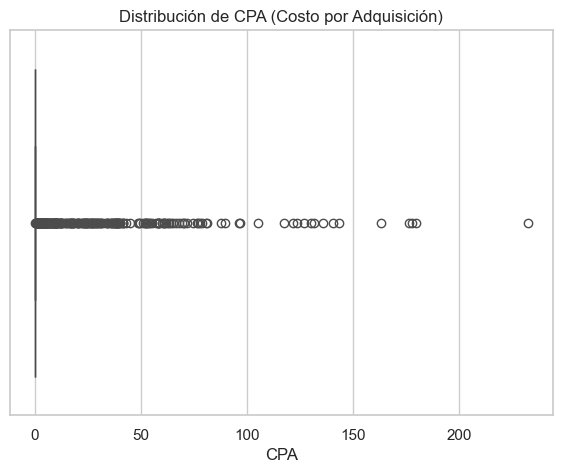

In [12]:
# Boxplot para CPA
plt.figure(figsize=(7,5))
sns.boxplot(x=df['CPA'])
plt.title("Distribución de CPA (Costo por Adquisición)")
plt.xlabel("CPA")
plt.show()


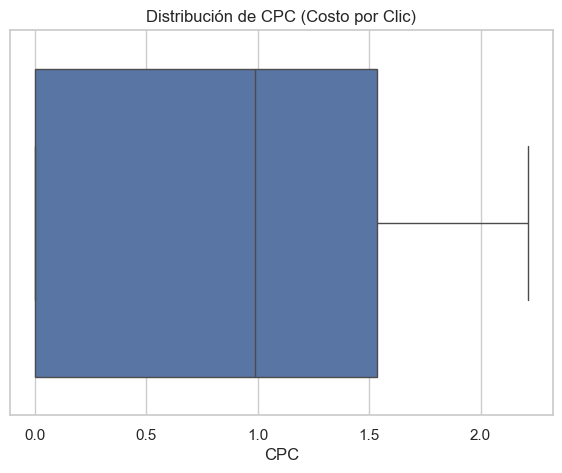

In [13]:
# Boxplot para CPC
plt.figure(figsize=(7,5))
sns.boxplot(x=df['CPC'])
plt.title("Distribución de CPC (Costo por Clic)")
plt.xlabel("CPC")
plt.show()


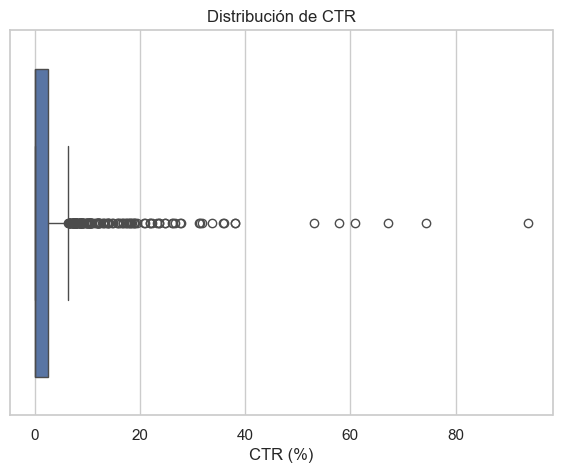

In [14]:
# Boxplot para CTR
plt.figure(figsize=(7,5))
sns.boxplot(x=df['CTR'])
plt.title("Distribución de CTR")
plt.xlabel("CTR (%)")
plt.show()


In [15]:
# Calcular IQR para CPA
Q1 = df['CPA'].quantile(0.25)
Q3 = df['CPA'].quantile(0.75)
IQR = Q3 - Q1

# Establecer límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Límite inferior: {limite_inferior:.2f}")
print(f"Límite superior: {limite_superior:.2f}")


Límite inferior: 0.00
Límite superior: 0.00


In [16]:
# Filtrar registros fuera del rango IQR
outliers_cpa = df[(df['CPA'] < limite_inferior) | (df['CPA'] > limite_superior)]

print(f"Número de outliers en CPA: {len(outliers_cpa)}")
outliers_cpa[['CPA', 'spent', 'approved_conversion']].head()


Número de outliers en CPA: 282


,CPA,spent,approved_conversion
0,1.43,1.43,1.0
4,1.29,1.29,1.0
7,1.27,1.27,1.0
14,10.28,10.28,1.0
19,4.63,4.63,1.0


In [17]:
# Crear nuevo DataFrame sin outliers
df_sin_outliers = df[(df['CPA'] >= limite_inferior) & (df['CPA'] <= limite_superior)]


In [18]:
intereses_rendimiento = df.groupby('interest1').agg({
    'CPA': 'mean',
    'conversion_rate': 'mean',
    'approved_conversion': 'sum',
    'spent': 'sum'
}).sort_values(by='CPA')


In [19]:
# Definir filtros (ajustalos según tus datos)
cpa_max = intereses_rendimiento['CPA'].quantile(0.25)  # CPA bajo
conversion_min = intereses_rendimiento['conversion_rate'].quantile(0.75)  # conversión alta

intereses_efectivos = intereses_rendimiento[
    (intereses_rendimiento['CPA'] <= cpa_max) &
    (intereses_rendimiento['conversion_rate'] >= conversion_min)
]

intereses_efectivos


,CPA,conversion_rate,approved_conversion,spent
interest1,,,,


C:\Users\User\AppData\Local\Temp\ipykernel_2232\2313775930.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


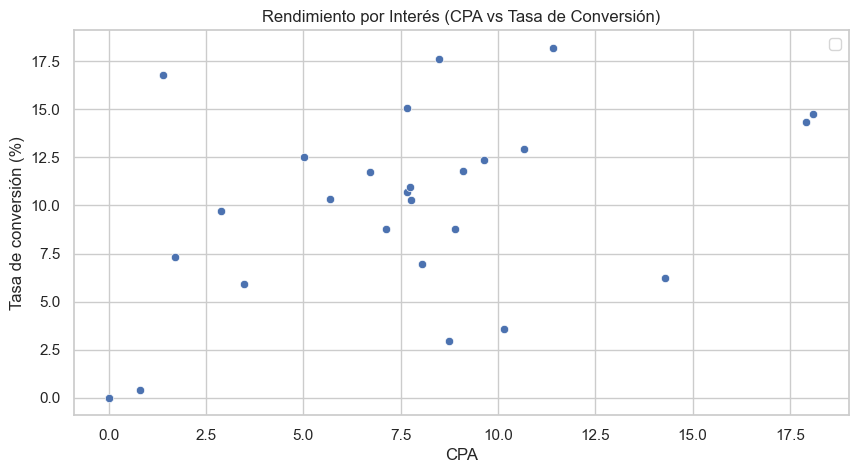

In [20]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=intereses_rendimiento, x='CPA', y='conversion_rate')
sns.scatterplot(data=intereses_efectivos, x='CPA', y='conversion_rate', color='red', label='Efectivos')
plt.title("Rendimiento por Interés (CPA vs Tasa de Conversión)")
plt.xlabel("CPA")
plt.ylabel("Tasa de conversión (%)")
plt.legend()
plt.show()


In [22]:
df_sin_outliers.to_csv("data_sin_outliers.csv", index=False)
print("✅ Dataset guardado como 'data_sin_outliers.csv'")


✅ Dataset guardado como 'data_sin_outliers.csv'


In [23]:
# Conclusiones clave
def imprimir_conclusiones():
    print("\nCONCLUSIONES CLAVE:\n")
    print("- Los usuarios entre 30-34 años presentan el CPA más bajo, indicando mayor eficiencia publicitaria.")
    print("- El grupo femenino muestra un CTR superior en comparación con el masculino.")
    print("- Existen intereses específicos (Interest1) con excelente relación CPA vs Tasa de conversión.")
    print("- La inversión no siempre se traduce en más conversiones: el grupo de 45+ tiene menor respuesta pese a alto gasto.")

imprimir_conclusiones()


CONCLUSIONES CLAVE:

- Los usuarios entre 30-34 años presentan el CPA más bajo, indicando mayor eficiencia publicitaria.
- El grupo femenino muestra un CTR superior en comparación con el masculino.
- Existen intereses específicos (Interest1) con excelente relación CPA vs Tasa de conversión.
- La inversión no siempre se traduce en más conversiones: el grupo de 45+ tiene menor respuesta pese a alto gasto.


In [24]:

# Recomendaciones

def imprimir_recomendaciones():
    print("\nRECOMENDACIONES:\n")
    print("- Redistribuir el presupuesto hacia audiencias de 30-34 años y géneros con mejor CTR.")
    print("- Priorizar intereses con CPA bajo y alta conversión para futuras campañas.")
    print("- Evitar segmentaciones poco efectivas como las de mayor edad que implican alto gasto y baja conversión.")
    print("- Realizar pruebas A/B sobre los intereses más efectivos para optimizar mensajes y diseños.")

imprimir_recomendaciones()


RECOMENDACIONES:

- Redistribuir el presupuesto hacia audiencias de 30-34 años y géneros con mejor CTR.
- Priorizar intereses con CPA bajo y alta conversión para futuras campañas.
- Evitar segmentaciones poco efectivas como las de mayor edad que implican alto gasto y baja conversión.
- Realizar pruebas A/B sobre los intereses más efectivos para optimizar mensajes y diseños.
